In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('data/train.csv', skipinitialspace=True, verbose=True)
df.info()

Tokenization took: 12.99 ms
Type conversion took: 17.99 ms
Parser memory cleanup took: 0.00 ms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  H

## MSSubClass

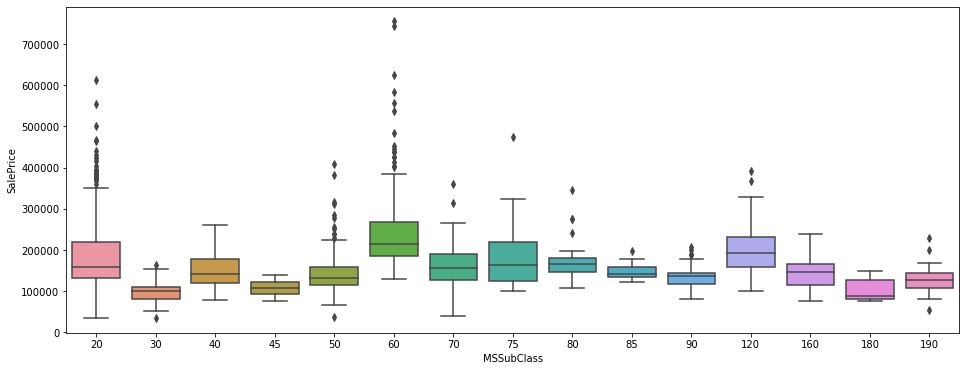

In [4]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='MSSubClass', y="SalePrice", data=df)

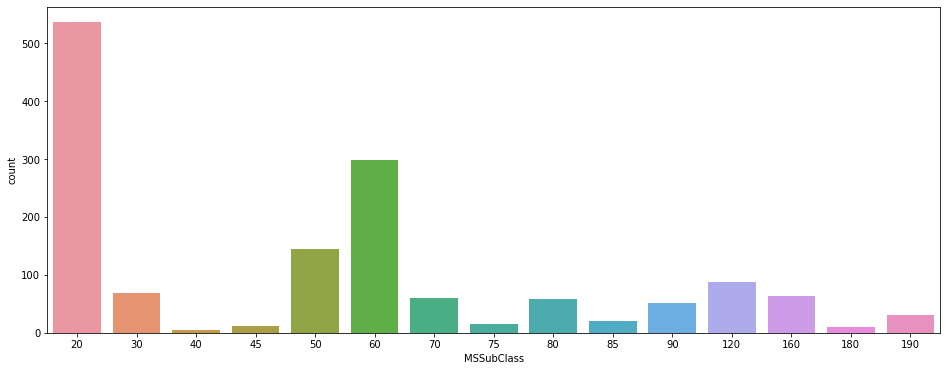

In [5]:
plt.figure(figsize=(16, 6))
sns.countplot(x='MSSubClass', data=df)

## MSZoning

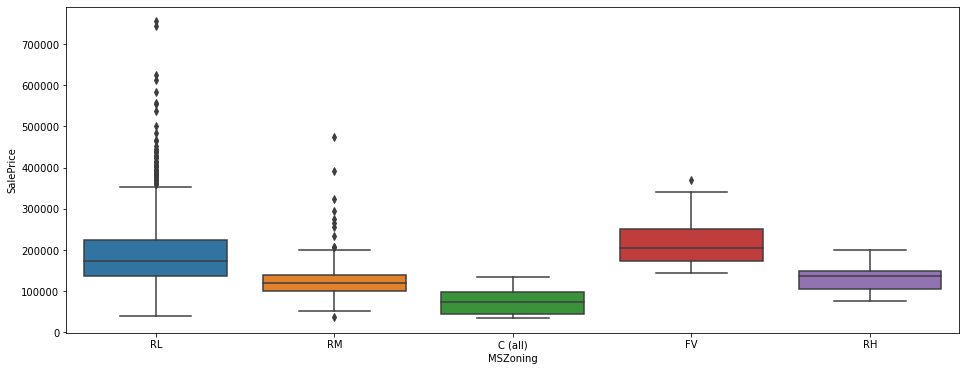

In [6]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='MSZoning', y="SalePrice", data=df)

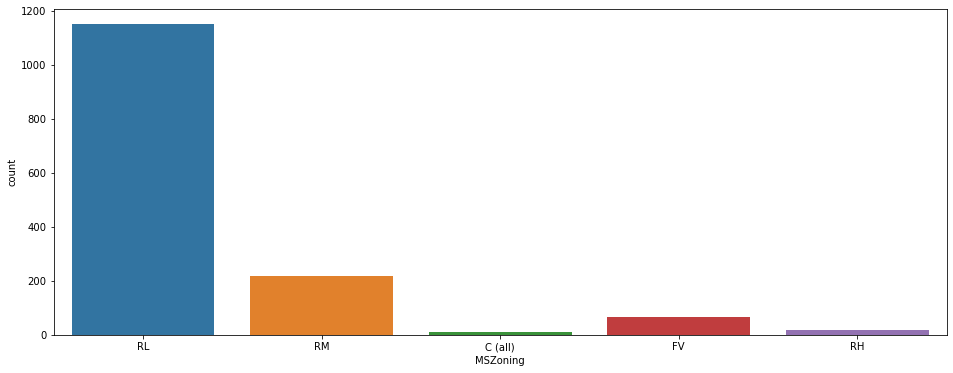

In [7]:
plt.figure(figsize=(16, 6))
sns.countplot(x='MSZoning', data=df)

## Electrical

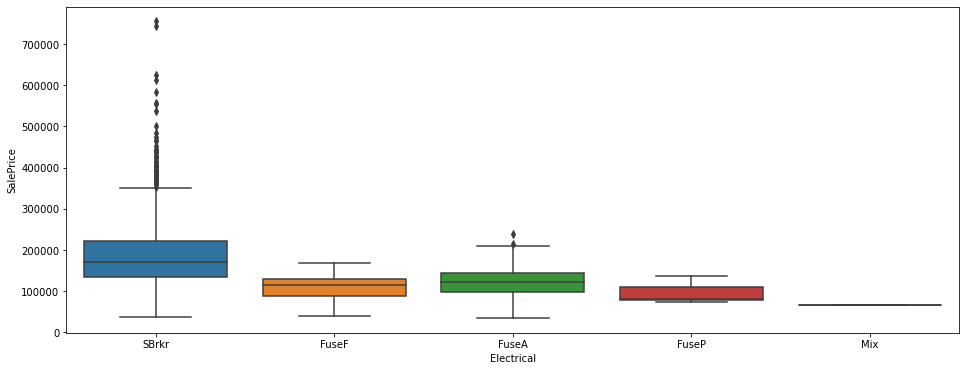

In [8]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Electrical', y="SalePrice", data=df)

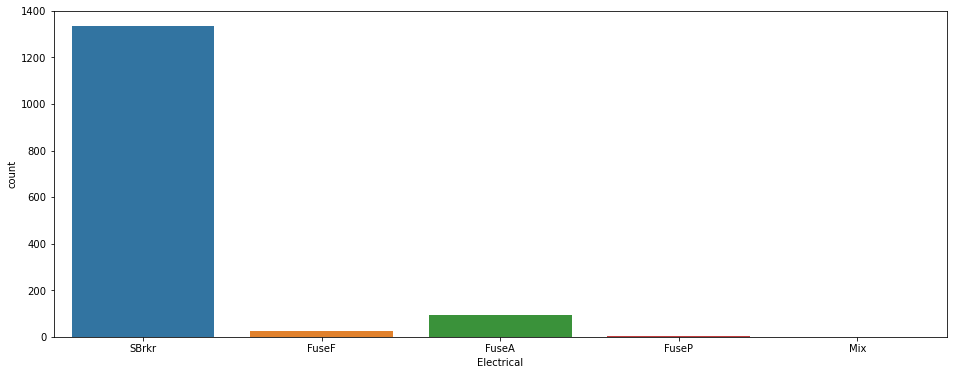

In [9]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Electrical', data=df)

d:\projects\kaggle\win-venv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
d:\projects\kaggle\win-venv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


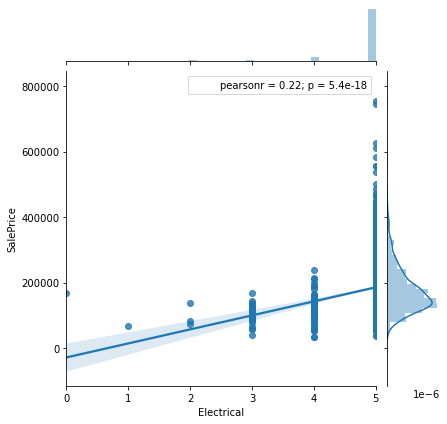

In [10]:
df['Electrical'] = df['Electrical'].fillna(0)
def int_code11(x):
    vals = [0, 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
    return vals.index(x)

df['Electrical'] = df['Electrical'].apply(int_code11)
plt.figure(figsize=(16, 6))
sns.jointplot(x='Electrical', y='SalePrice', data=df,
                      kind='reg').annotate(stats.pearsonr)

d:\projects\kaggle\win-venv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
d:\projects\kaggle\win-venv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 1152x432 with 0 Axes>

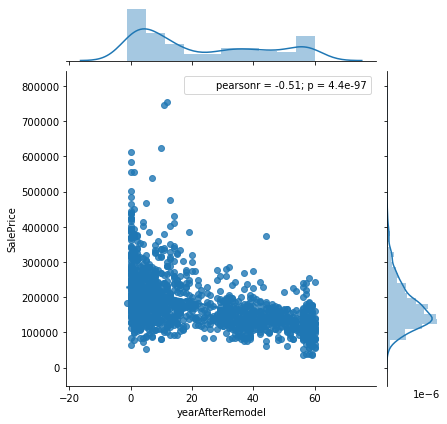

<Figure size 1152x432 with 0 Axes>

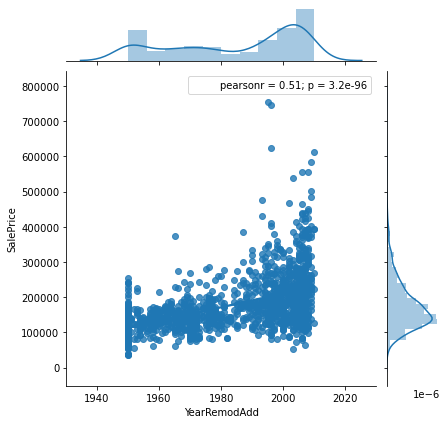

In [16]:
df['yearAfterRemodel'] = df['YrSold'] - df['YearRemodAdd']
plt.figure(figsize=(16, 6))
sns.jointplot(x='yearAfterRemodel', y='SalePrice', data=df,
                      kind='reg').annotate(stats.pearsonr)
plt.figure(figsize=(16, 6))
sns.jointplot(x='YearRemodAdd', y='SalePrice', data=df,
                      kind='reg').annotate(stats.pearsonr)

## Street

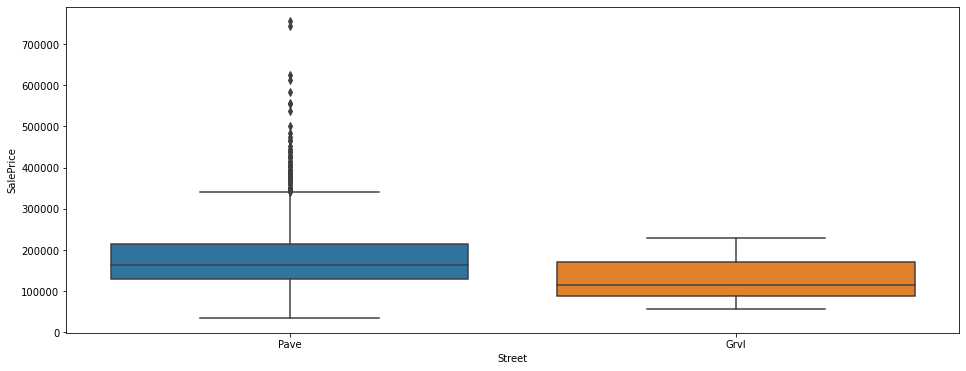

In [11]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Street', y="SalePrice", data=df)

## SalePrice

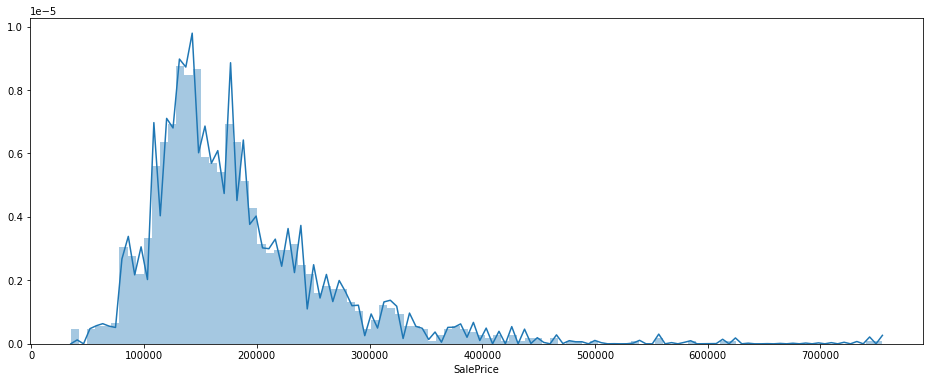

In [12]:
plt.figure(figsize=(16, 6))
sns.distplot(df['SalePrice'], bins=100, kde_kws=dict(bw=0.5))

After log transformation

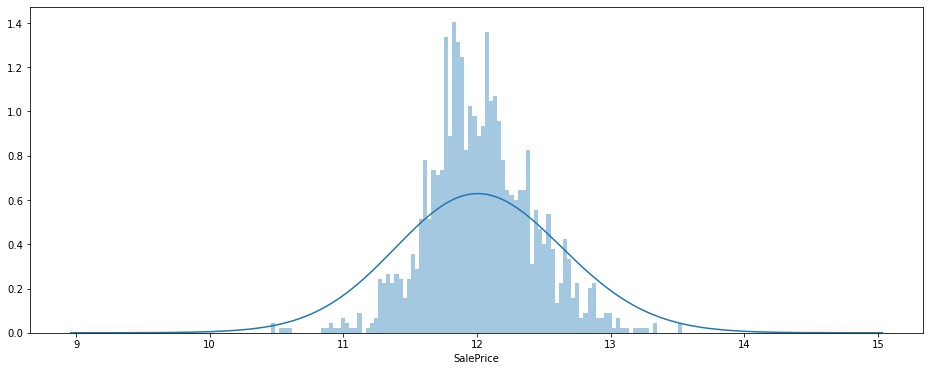

In [13]:
plt.figure(figsize=(16, 6))
temp_series = np.log(df['SalePrice'])
sns.distplot(temp_series, bins=100, kde_kws=dict(bw=0.5))

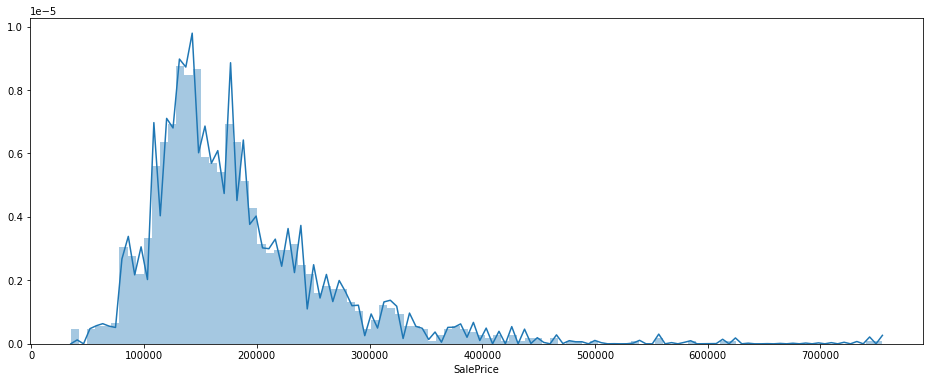

In [14]:
plt.figure(figsize=(16, 6))
temp_series = np.exp(temp_series)
sns.distplot(temp_series, bins=100, kde_kws=dict(bw=0.5))